# ALG-Practica 

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

## 1.1 Carga del dataset y exploración de datos
Descargamos el dataset de Auto MPG del repositorio de Machine Learning de UC Irvine. En este dataset encontramos informacion sobre el consumo de combustible de una muestra de vehiculos, en base a sus caracteristicas. Lo primero que hacemos es familiarizarnos con los datos incluidos en este dataset, para entender el tipo de informacion que contiene.


In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [2]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Ahora creamos una función a la que le pasaremos los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. 

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    """
    Esta funcion crea una grafica de visualizacion usando como 
    variables una de las categorias del dataframe, y la variable target.
    """
    ## Nos aseguramos de que el conjunto es compatible
    y_flat = y.values.ravel()

    # Creamos la grafica de visualizacion
    plt.figure(figsize=(8, 6))
    ## Determinamos los valores que apareceran en la grafica, y como lo haran
    plt.scatter(df[nombre_columna], y_flat, color='blue', alpha=0.7, edgecolors='k', s=50)
    ## Definimos el titulo de la grafica
    plt.title(f"Target vs {nombre_columna}", fontsize=14)
    ## Definimos la etiqueta del eje "x"
    plt.xlabel(nombre_columna, fontsize=12)
    ## Definimos la etiqueta del eje "y"
    plt.ylabel("Milles per Gallon (mpg)", fontsize=12)
    ## Creamos una division del graphico en cuadrantes
    plt.grid(True, linestyle='--', alpha=0.6)
    ## Mostramos la grafica
    plt.show()


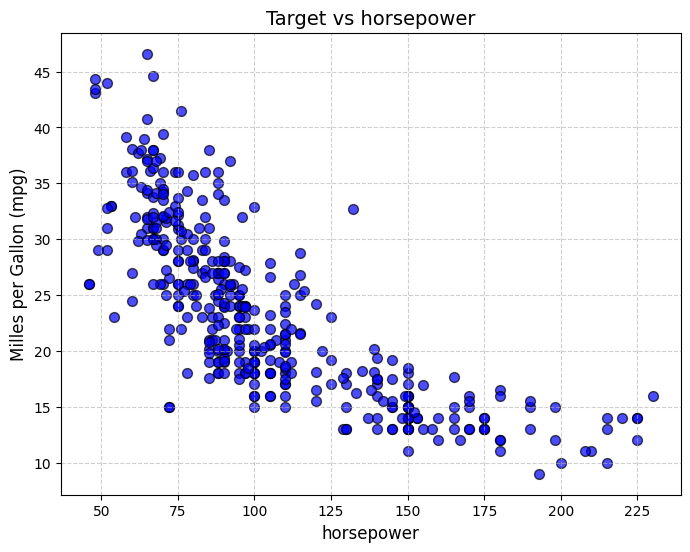

In [6]:
visualiza(X, y, 'horsepower')

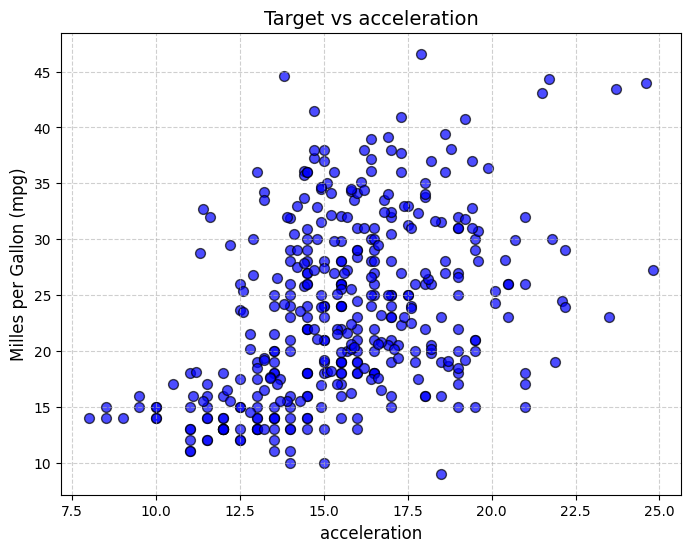

In [7]:
visualiza(X, y, 'acceleration')

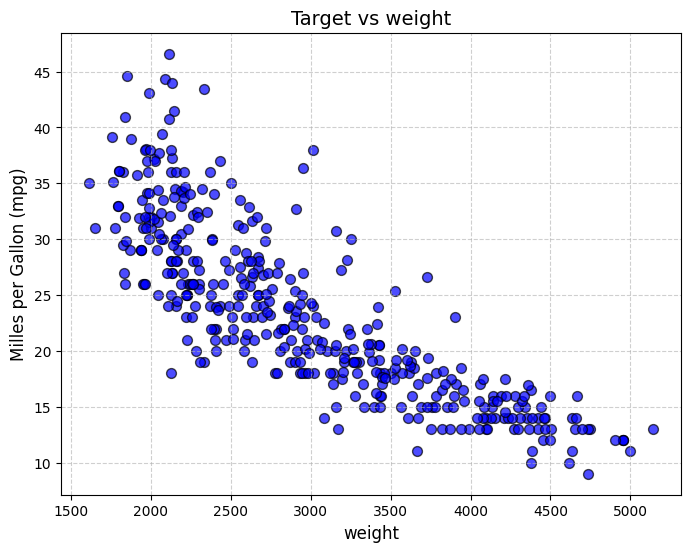

In [8]:
visualiza(X, y, 'weight')

## 1.2 Implementacion del modelo

A continuacion crearemos una función que implemente el metodo de Minimos Cuadrados Ordinarios, a la que nombraremos por su nombre en ingles "Ordinary Least Squares" (OLS). Esta funcion nos permitira conocer los valores de la regresion lineal, con los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, nuestra funcion lo traspondra antes de realizar las operaciones. 

In [9]:
def pesos_ols(X, y):
    """
    Calcula los pesos (w) de la regresion lineal usando la formula OLS.
    Recibe un matrix X y un vector y, y devuelve un array con los pesos (w).
    """

    ## Nos aseguramos de que X e Y tienen las dimensiones adecuadas para la operacion
    if X.shape[0] < X.shape[1]:
        X = X.T 

    ## Añadimos una columna de 1s a la matriz X para que tenga la forma adecuada
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))

    ## Calculamos los pesos
    try:
        XtX_inv = np.linalg.inv(X_with_bias.T @ X_with_bias)
    except np.linalg.LinAlgError:
        raise ValueError("Error en la inversion de la matriz.")

    w = XtX_inv @ X_with_bias.T @ y 

    return w

Usamos los datos de ejemplo provistos y su solucion para comprobar que la funcion nos devuelve el mismo resultado. Una vez hecha esta comprobacion, procedemos a la siguiente parte de la practica.

In [10]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

En esta parte de la practica, usaremos la funcion `pesos` que hemos creado, con el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibujamos en la misma grafica los datos junto con la recta que hemos obtenido. Para poder aplicar las operaciones matriciales, y prevenir cualquier error, convertimos los dataframes de Panda en arrays de numpy.


In [11]:
def plot_fit(X, y, w, feature_name):
    """
    Calcula los datos y la regresion lineal y crea una grafica de visualizacion.
    Recibe un array 'X', un array 'y', y los pesos calculados 'w'.
    """
    # Nos aseguramos de que los dataframes de Panda se convierten en arrays de Numpy.
    if not isinstance(X, np.ndarray):
        X = X.values
    if not isinstance(y, np.ndarray):
        y = y.values

    # Genera predicciones para la regresion lineal
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    y_pred = X_with_bias @ w

    ## Creamos la grafica de visualizacion
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, edgecolors='k', label='Datos')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regresion Lineal')
    plt.title(f"Fuel Consumption vs {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Miles per Gallon (mpg)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()


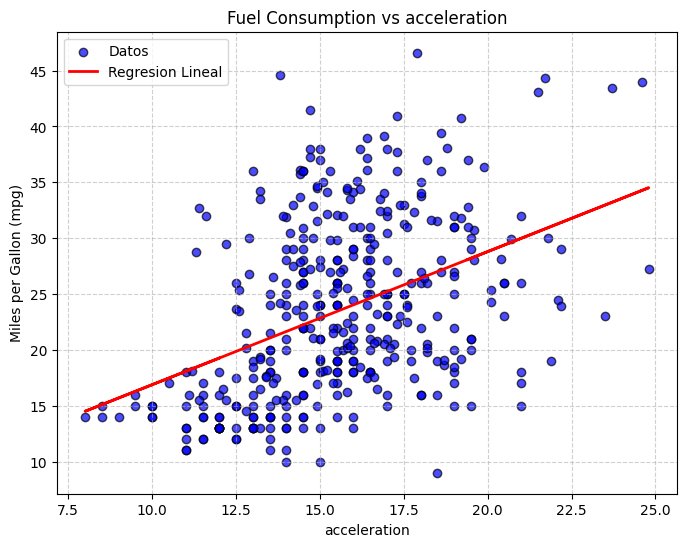

In [12]:
## Comprobamos que la funcion es correcta aplicandola a una de las columnas de nuestro dataset

X = auto_mpg.data.features[['acceleration']] 
y = auto_mpg.data.targets[['mpg']]                  

w = pesos_ols(X, y)  
plot_fit(X, y, w, 'acceleration')   


Para crear una visualizacion grafica de todas nuestras columnas sin necesidad de llamar a la funcion 'plot_fit' por cada una de ellas, creamos una funcion que crea automaticamente una grafica por cada columna de nuestro dataset.

In [13]:
def plot_all(X, y, feature_names):
    """
    Recibe un dataframe o numpy array 'X', otro 'y', una lista
    con los nombres de las columnas, y devuelve un grafico con
    los datos del dataframe y su regresion lineal por cada una 
    de las columnas del dataframe.
    """
    for feature in feature_names:
        ## Extraemos la columna 
        X_feature = X[[feature]]
        
        ## Aplicamos nuestra funcion para calcular los pesos
        w = pesos_ols(X_feature, y)

        ## Aplicamos la funcion que crea la grafica con la regresion lineal
        plot_fit(X_feature, y, w, feature_name=feature)
        
    

In [14]:

## Extraemos los parametros que vamos a aplicar en nuestra funcion del dataset
X = auto_mpg.data.features 
y = auto_mpg.data.targets   

# Creamos la lista de columnos que se aplicara a nuestras graficas
feature_names = X.columns.tolist()

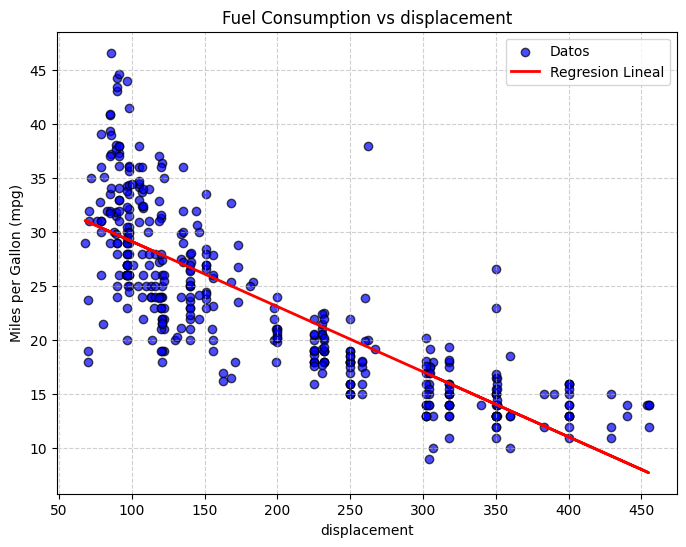

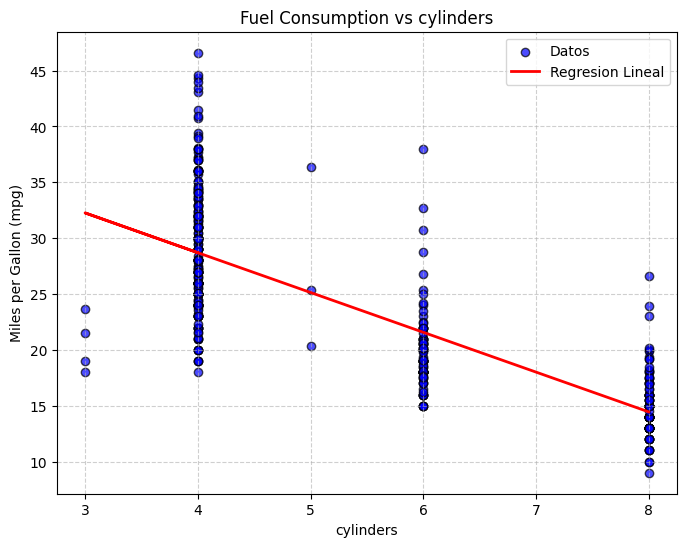

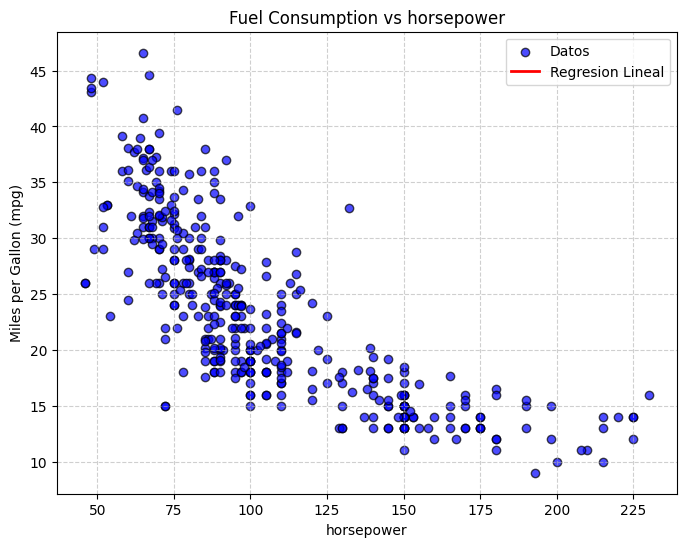

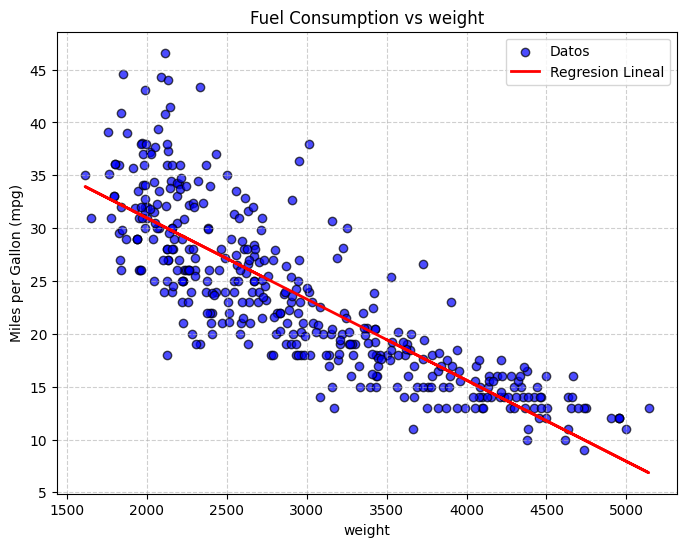

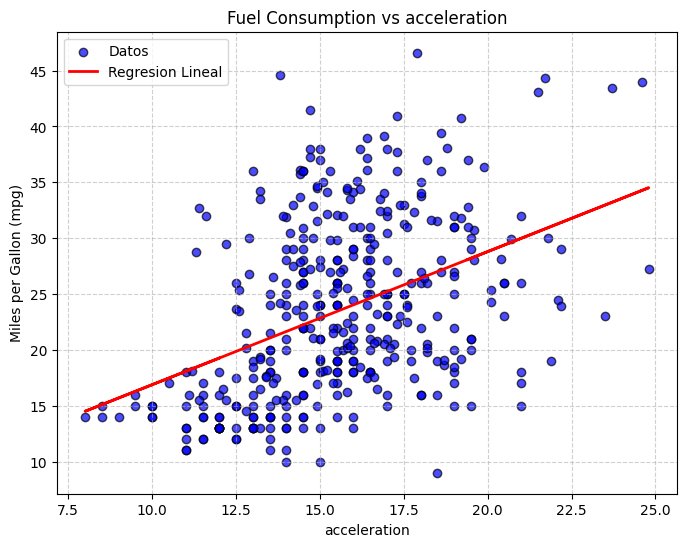

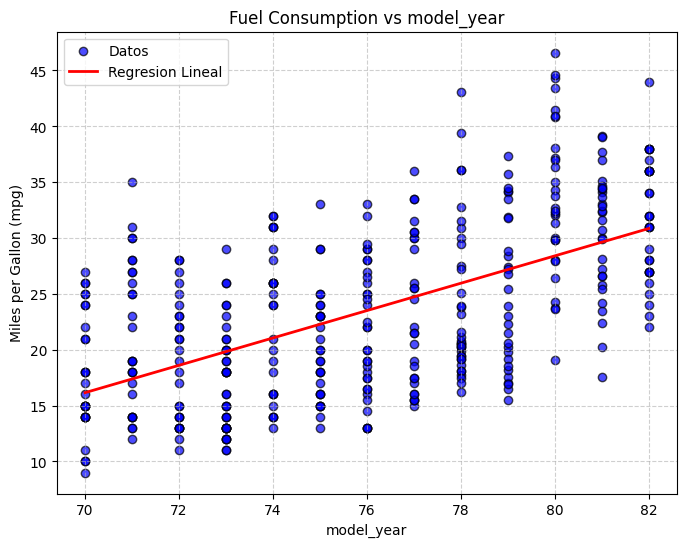

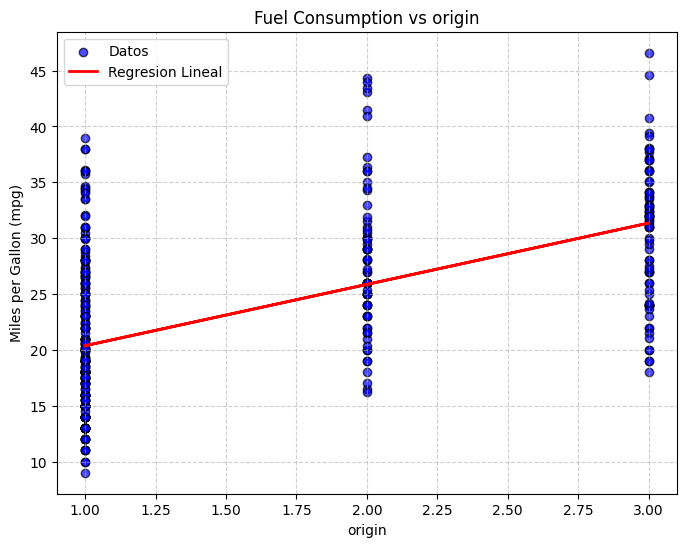

In [15]:
plot_all(X, y, feature_names)

Una vez hecho esto vamos a comparar nuestro resultado con el que nos da scikitlearn.

In [32]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


De acuerdo con scikit-learn, el punto de corte es 46.31736442, y la pendiente -0.00767661. Para estar completamente seguros de que esto es correcto, y que nuestra funcion produce los mismos resultados, procedemos a compararlas.

In [18]:
X_ols = X[['weight']].values
y_ols = y.values

w_ols = pesos_ols(X_ols, y_ols)

intercept_ols = w_ols[0]
coefficient_ols = w_ols[1]

print("OLS Results:")
print(f"Punto de corte: {intercept_ols}")
print(f"Pendiente: {coefficient_ols}")

OLS Results:
Punto de corte: [46.31736442]
Pendiente: [-0.00767661]


In [22]:
print("\nComparacion de Resultados:")
print(f"Scikit-learn Punto de corte: {lr.intercept_}")
print(f"OLS Punto de corte: {intercept_ols}")
print(f"Scikit-learn Pendiente: {lr.coef_}")
print(f"OLS Pendiente: {coefficient_ols}")


Comparacion de Resultados:
Scikit-learn Punto de corte: [46.31736442]
OLS Punto de corte: [46.31736442]
Scikit-learn Pendiente: [[-0.00767661]]
OLS Pendiente: [-0.00767661]


In [27]:
# Usamos sklearn para predecir los valores de nuestra implementacion
y_pred_sklearn = lr.predict(X_lr)

# Comparamos los resultados obtenidos con nuestra funcion OLS, y los obtenidos con sklearn
w_custom = pesos_ols(X_lr, y_lr)
X_lr_with_bias = np.hstack((np.ones((X_lr.shape[0], 1)), X_lr))
y_pred_custom = X_lr_with_bias @ w_custom

# Hacemos print de esos resultados para compararlos
print("\nComparacion de Resultados:")
print(f"Funcion OLS: {y_pred_custom[:5]}")
print(f"Scikit-learn: {y_pred_sklearn[:5]}")



Comparacion de Resultados:
Funcion OLS:          mpg
0  19.418523
1  17.967643
2  19.940532
3  19.963562
4  19.840736
Scikit-learn: [[19.41852276]
 [17.96764345]
 [19.94053224]
 [19.96356207]
 [19.84073631]]


Los resultados obtenidos por nuestra funcion OLS son casi identicos a los obtenidos usando Scikit-learn, de lo que podriamos concluir que nuestra funcion es correcta. 

Para comparar de manera visual estos resultados, podemos crear una grafica como las creadas anteriormente, donde mostremos tanto la regresion lineal calculada por nuestra funcion, como la calculada por Scikit-learn.

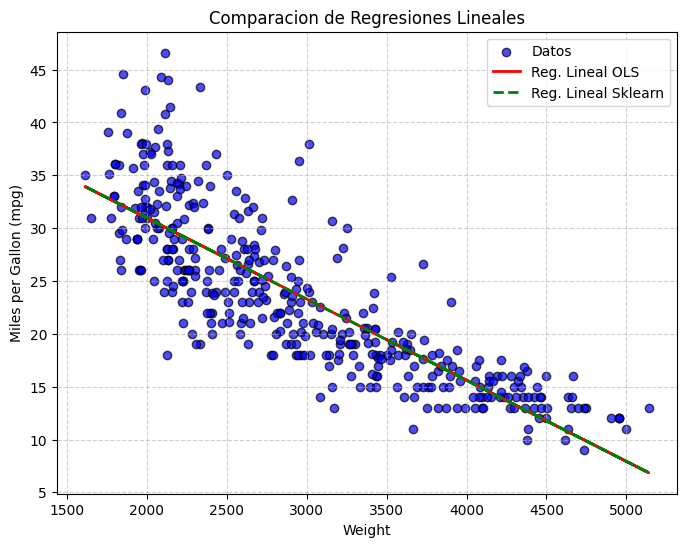

In [28]:
# Creamos el grafico 
plt.figure(figsize=(8, 6))
plt.scatter(X_lr, y_lr, color='blue', alpha=0.7, edgecolors='k', label='Datos')

# Trazamos la regresion lineal calculada por nuestra funcion OLS
plt.plot(X_lr, y_pred_custom, color='red', linewidth=2, label='Reg. Lineal OLS')

# Trazamos la regresion lineal calculada por Scikit-learn
plt.plot(X_lr, y_pred_sklearn, color='green', linestyle='--', linewidth=2, label='Reg. Lineal Sklearn')

plt.title("Comparacion de Regresiones Lineales")
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon (mpg)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

Mientras que el metodo de minimos cuadrados (OLS) es una solucion matematica directa al problema de la regresion lineal, el descenso del gradiente realiza un proceso de optimizacion iterativa que encuentra el minimo global de la funcion de funcion. 

El metodo de minimos cuadrados minimiza la suma de los cuadrados residuales, y a traves de esa formula calcula directamente los coeficientes de regresion. 

Por otro lado, el descenso del gradiente comienza con pesos iniciales que se actualizan repetidamente utilizando el gradiente de la función de coste hasta que convergen en el mínimo global. En el caso de la regresión lineal, ambos métodos producen resultados equivalentes cuando se implementan correctamente.

La decisión de cuándo usar un método u otro depende de varios factores, como el tamaño del dataset, las restricciones de tiempo o la capacidad computacional. Por ejemplo, si el tamaño del dataset es pequeño o moderado, el método OLS suele ser más eficiente y rápido. Sin embargo, si el dataset es muy grande, o necesitamos gestionar datos que se siguen generando en tiempo real, el descenso del gradiente es más adecuado, ya que es más escalable y requiere menos memoria.

## 2. Optimización con descenso del gradiente [OPCIONAL]
### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

In [37]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta):
    """
    
    """
    # Inicializamos las variables
    loss_iter = []         
    w_iter = []            
    w = w0                  
    
    # Añadimos la columna de 1s
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Creamos el bucle para las iteraciones
    for _ in range(n_iter):
        # Calculate predictions
        y_pred = X_with_bias @ w
        
        # Calculate the gradient of the RSS
        gradient = X_with_bias.T @ (y_pred - y)
        
        # Update weights
        w = w - eta * gradient
        
        # Calculate loss (RSS)
        loss = (1 / 2) * np.sum((y_pred - y) ** 2)
        
        # Store results
        w_iter.append(w.copy())
        loss_iter.append(loss)
    
    # Devuelve los resultados como arrays de numpy
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01
iteraciones = 2000


np.random.seed(123)
w0 = np.random.rand(2, 1)


y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5, 1))
X = np.array([[0.37020659],
              [-0.48234664],
              [0.51483616],
              [0.38352774],
              [1.29888065]])


weights, loss = gradient_descent(X, y, w0, iteraciones, eta)


print("Pesos Finales:")
print(weights[-1])


Pesos Finales:
[[183845.82320222]
 [ 40415.66453324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [38]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, primero vamos a escalar nuestras variables, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

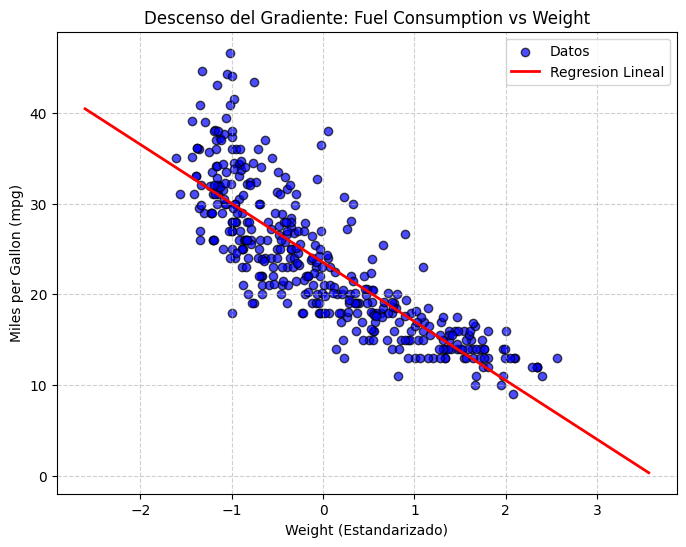

Pesos Finales (Punto de Corte y Pendiente):
[[-4.74061156e-17]
 [-8.31740933e-01]]

Primeros 5 Valores de Perdida:
[406.54359545 186.43882622 106.67197744  77.76415237  67.28784093]


In [46]:
# Escalamos las variables X e y
X_gd = (X_np - X_np.mean()) / X_np.std() 
y_mean = y_np.mean()
y_std = y_np.std()
y_gd_scaled = (y_np - y_mean) / y_std  

# Aplicamos la funcion que hemos creado
weights, loss = gradient_descent(X_gd, y_gd_scaled, w0, iterations, eta)

# Reescalamos las predicciones a la escala original
X_with_bias = np.hstack((np.ones((X_gd.shape[0], 1)), X_gd))
y_pred_scaled = X_with_bias @ weights[-1]
y_pred_original = (y_pred_scaled * y_std) + y_mean

# Generamos la grafica de resultado
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1
x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
x_range_with_bias = np.hstack((np.ones((x_range.shape[0], 1)), x_range))
y_pred_line_scaled = x_range_with_bias @ weights[-1]
y_pred_line = (y_pred_line_scaled * y_std) + y_mean

plt.figure(figsize=(8, 6))
plt.scatter(X_gd, y_gd, color='blue', alpha=0.7, edgecolors='k', label='Datos')
plt.plot(x_range, y_pred_line, color='red', linewidth=2, label='Regresion Lineal')
plt.title("Descenso del Gradiente: Fuel Consumption vs Weight")
plt.xlabel("Weight (Estandarizado)")
plt.ylabel("Miles per Gallon (mpg)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display final weights and first few loss values
print("Pesos Finales (Punto de Corte y Pendiente):")
print(weights[-1])
print("\nPrimeros 5 Valores de Perdida:")
print(loss[:5])
